In [1]:
import joblib
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import ListedColormap

model = joblib.load("../models/kmeans.pkl")
df = pd.read_csv("../data/Mail_Customer_Cluster.csv")

In [2]:
centers = model.cluster_centers_

In [4]:
def plot_clusters(df, cols, n_colors,):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection="3d")
    
    
    colors = plt.cm.tab10.colors[:n_colors]
    colors = ListedColormap(colors)
    
    for i, center in enumerate(centers):
        ax.scatter(*center, s=250, alpha=0.5)
        ax.text(*center, i, fontsize=12, horizontalalignment="center", verticalalignment="center")
        
        
    s = ax.scatter(df[cols[0]], df[cols[1]], df[cols[2]], c=df["cluster"], cmap=colors)
    ax.legend(*s.legend_elements(), bbox_to_anchor=(1.4, 0.8))
    ax.set_xlabel("Age")
    ax.set_ylabel("Annual Income (k$)")
    ax.set_zlabel("Spending Score (1-100)")
    
    plt.show()

In [9]:
cols = list(df.columns.difference(["Gender", 'cluster']))

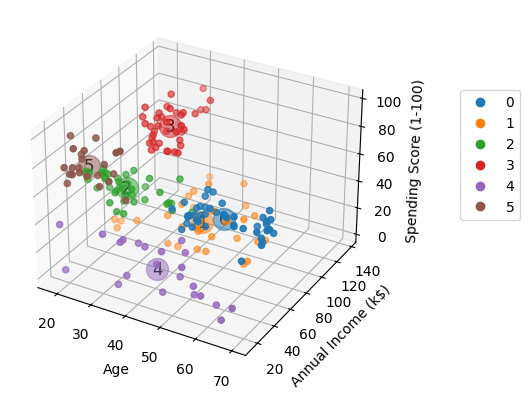

In [10]:
plot_clusters(df, cols, 6)